In [2]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [3]:
# Set parameters.
nx = 41  # number spatial grid points
L = 2.0  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.3  # viscosity

sigma = 0.5
dt = sigma*dx**2/nu
nt = 20

In [4]:
# Get the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

In [5]:
# Set the initial conditions.
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0
u0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [66]:
# Integrate in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i]=un[i]+sigma*(un[i-1]-2*un[i]+un[i+1])
        #u[0]=1.0
        #u[-1]=1.0
        
u_naive=u

In [67]:
#Integrate in time.
u = u0.copy()
for n in range(nt):
    un=u.copy()
    u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])

In [68]:
numpy.allclose(u_naive,u)

True

In [69]:
def diffusion(u0,sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un=u.copy()
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

In [70]:
u_hist=diffusion(u0,sigma=sigma,nt=nt)

In [71]:
len(u_hist)

21

In [72]:
def plot_solution(n,u_hist,x):

    pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0],label='initial')
    pyplot.plot(x, u_hist[n],label='current')
    pyplot.legend(loc='upper right')
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

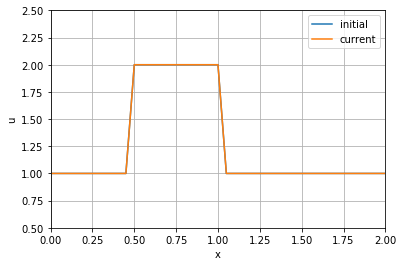

In [73]:
plot_solution(0,u_hist,x)

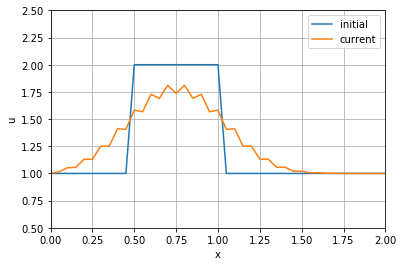

In [74]:
plot_solution(-1,u_hist,x)

In [75]:
import ipywidgets as ipywg

In [76]:
nt_slider = ipywg.IntSlider(value=0,min=0,max=nt,step=1,
                            description='Time Step')

w = ipywg.interactive(plot_solution,n=nt_slider,
                      u_hist=ipywg.fixed(u_hist),
                      x=ipywg.fixed(x))

In [77]:
display(w)

interactive(children=(IntSlider(value=0, description='Time Step', max=20), Output()), _dom_classes=('widget-in…